In [28]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import math
import array
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [29]:
train = np.loadtxt('training.txt')
validate = np.loadtxt('validate.txt')
train = train-np.mean(train)
validate = validate - np.mean(validate)
N = train.shape[0]
Nv = validate.shape[0]
x = []
y = []
z = []
y_v = []

0.000142243838257
0.0581003856764


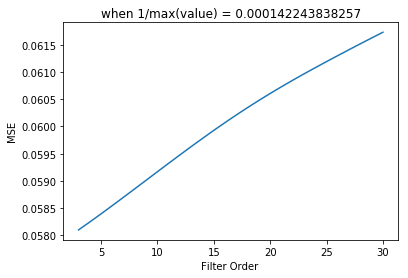

In [30]:
for m in range(3,31):
    X = np.zeros(shape=(m,N-m))
    Y = train[m:N]  # Y is N-m*1 matrix
    #print(Y.shape)
    for i in range(0,N-m):
        temp = train[i:i+m]
        X[:,i] = temp[::-1] # X is m*N-m matrix
    R = X@X.T
    value, vector = np.linalg.eig(R)
    step_up = 1/max(value)
    step = np.arange(step_up/10,step_up+step_up/11,step_up/10)
    j=1
    sum_rms = 0
    w = np.zeros(shape=(m,1)) # w is m*1 matrix
    for iteration in range(0,N-m):
        #w = w + step[j]*(X[:,iteration].T@w-Y[iteration])*X[:,iteration]
        error = X[:,iteration].T@w-Y[iteration]
        J = step[j]*error*X[:,iteration]
        w[:,0] = w[:,0] + J.T
        #print(w)
    Xv = np.zeros(shape=(m,Nv-m))
    Yv = validate[m:Nv]
    for p in range(0,Nv-m):
        temp = train[p:p+m]
        Xv[:,p] = temp[::-1]
    yv = w.T@Xv
    MSE = np.zeros(shape=(Nv-m,1))
    for n in range(0,Nv-m):
        MSE[n] = (Yv[n] - yv.T[n])**2
    x.append(m)
    y.append(step[j])
    z.append(MSE.sum()/(Nv-m))
print(step_up)
print(z[0])
plt.plot(x,z)
plt.title('when 1/max(value) = 0.000142243838257')
plt.xlabel('Filter Order ')
plt.ylabel('MSE')
plt.show()